# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center">Acea Smart Water Analytics 💦</p>

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center">Predicting Water Availability </p>

In [1]:
#Linear algebra and Data Processing
import numpy as np
import pandas as pd

#Time Series conversion
import datetime as dt

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('RdBu')

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

#model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, ParameterGrid

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">1. Problem Introduction </p>

A water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter water bodies are refilled, but during spring and summer they start to drain. To help preserve the health of these water bodies, it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

Acea group is one the leading Italian multiutility operators, listed on Italian Stock Exchange since 1999. The company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in various regions

The Acea Group provides data for 4 types of water bodies, namely, 

* Water Spring

* Lake

* River

* Aquifer

While the primary intention is the same i.e., to predict water availability, the reality is that each waterbody has such unique characteristics that their attributes are not linked to each other.

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">2. Springs - Amiata Spring 🌊</p>

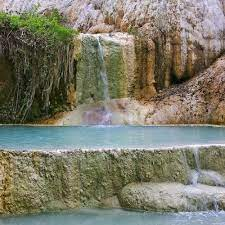

A spring is a point of exit at which groundwater from an aquifer flows out on top of Earth's crust (pedosphere) and becomes surface water. Springs are driven out onto the surface by various natural forces, such as gravity and hydrostatic pressure. They vary in volumetric flow rate from nearly zero to more than 14,000 litres per second for the biggest springs.

Information about the Amiata aquifer. This aquifer is accessed through the Ermicciolo, Arbure, Bugnano and Galleria Alta springs. The levels and volumes of the four springs are influenced by the parameters: ```pluviometry```, ```sub-gradation```, ```hydrometry```, ```temperatures``` and ```drainage volumes```.

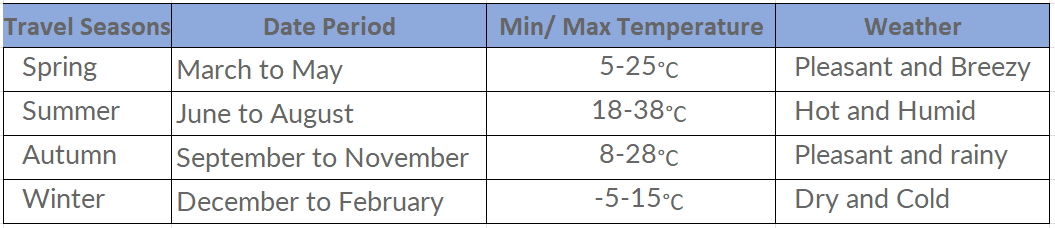

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">3. Exploratory Data Analysis 🔎</p>

In [17]:
#Importing the Dataset
df = pd.read_csv('Water_Spring_Amiata.csv')
df.tail()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.70,18.30,19.20,-0.359942,-2.925253,-5.75661,-21.358856
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.50,17.95,18.85,-0.359942,-2.925253,-5.75661,-21.358856
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,22.10,19.90,20.45,-0.341945,-2.778991,-5.46878,-20.290913
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.28,22.45,20.15,20.20,-0.359942,-2.925253,-5.75661,-21.358856
7486,30/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.27,22.00,20.35,21.10,-0.359942,-2.925253,-5.75661,-21.358856


---
Features:
* **Rainfall** indicates the quantity of rain falling (mm)
* **Temperature** indicates the temperature (°C)
* **Depth to Groundwater** indicates the groundwater level (m from the ground floor)

Target:
* **Flowrate** indicates the speed of flow of water (Litres per second)
---

In [3]:
#Checking the dataset shape
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1])

Number of rows is =  7487  
Number of columns is =  16


In [4]:
#Summarized information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

---

 - All features are of expected data type, except the _Date Column_ which will need be converted to ```datetime``` for efficient analysis.

 - Majority of the columns have more than 50% of NULL values

---

In [5]:
#Checking the start and end date
print('Starting date is :' , df.Date.head(1),
      '\nEnding Date is : ',df.Date.tail(1))

Starting date is : 0    01/01/2000
Name: Date, dtype: object 
Ending Date is :  7486    30/06/2020
Name: Date, dtype: object


---

The observations recorded in this dataset spans the period between January 2000 and June 2020. 

---

In [6]:
#Descriptive Statistics of columns/features
df.describe()

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
count,6291.000000,3586.000000,2633.000000,2865.000000,2212.000000,3569.000000,3594.00000,3242.000000,3583.000000,7487.000000,3604.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.624034,3.784830,4.095784,4.332845,2.866456,-38.118649,-51.64424,-302.697412,12.159503,11.248898,10.788166,-0.259413,-2.009348,-4.507117,-20.972385
std,7.997019,11.358671,11.861017,12.143496,7.471131,1.239967,0.93864,7.641590,7.085829,6.818232,6.711271,0.130209,1.062751,1.465277,2.034663
min,0.000000,0.000000,0.000000,0.000000,0.000000,-40.790000,-53.64000,-314.710000,-8.450000,-8.950000,-8.550000,-0.385529,-3.042149,-6.469258,-26.089554
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-39.240000,-52.44000,-309.435000,6.700000,5.950000,5.400000,-0.348533,-2.785148,-5.422521,-22.485956
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-38.120000,-51.65000,-303.365000,11.750000,11.050000,10.450000,-0.319199,-2.491041,-4.862256,-20.718974
75%,0.600000,1.400000,1.800000,1.800000,1.400000,-36.930000,-50.76000,-295.332500,17.650000,16.750000,15.950000,-0.219417,-1.695151,-3.872881,-19.241000
max,149.600000,228.500000,220.000000,165.200000,79.200000,-36.380000,-50.24000,-290.580000,30.150000,28.200000,28.000000,0.000000,0.000000,0.000000,-17.098023


---
 - The description above emphasizes the seasonality of the dataset, as Rainfall values begin to read on the 75th percentile, shows proves the fact that rainy season in the country takes 25% of the year period.
 - Galleria Alta appears to be the largest river of the four, having the largest flowrate/volume values
---

#### Analysis of Missingness

<AxesSubplot:>

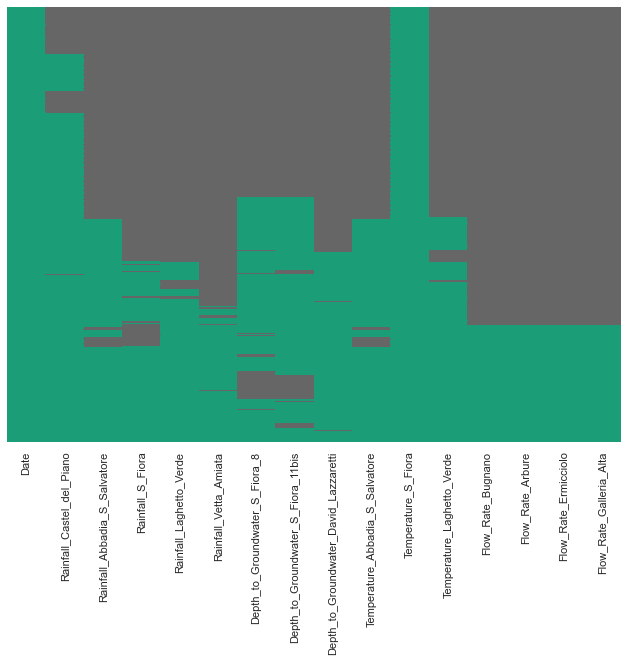

In [7]:
#An overview of missing values per feature

sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Dark2")

---

Missing values mapped as gray in the image above.

Huge missingness observed in the dataset. More than 60% missingness for more than 10 out of the 16 features.

---

In [9]:
#Quantifying the missing values
pd.Series(df.isnull().sum()/len(df)).rename_axis('features/target')\
.to_frame('Missing Value Percentage').sort_values('Missing Value Percentage', ascending=False)

,Missing Value Percentage
features/target,
Flow_Rate_Bugnano,0.731802
Flow_Rate_Arbure,0.731802
Flow_Rate_Ermicciolo,0.731802
Flow_Rate_Galleria_Alta,0.731802
Rainfall_Vetta_Amiata,0.704555
Rainfall_S_Fiora,0.648324
Rainfall_Laghetto_Verde,0.617337
Depth_to_Groundwater_David_Lazzaretti,0.566983
Depth_to_Groundwater_S_Fiora_8,0.523307


---
 - The largest missingness is found in the _Flowrate columns_ which happen to be the output features.
 - This will be a major consideration in determining the threshold for dropping NULL values.
---

In [18]:
#Converting the date column to datetime time
#to allow for efficient analysis
df.Date = pd.to_datetime(df.Date)

# get a year from corresponding Date column value
df['year'] = df['Date'].dt.year
 
# get a month from corresponding Date column value
df['month'] = df['Date'].dt.month

#Review the shape of the adjusted dataframe
display(df.shape)

#Viewing the top 5 rows
df.set_index('Date', inplace = True)

(7487, 18)

---
 - A dataframe grouping allows visibility on the distribution of data collected over years. Also helps to understand the weight of missingness for each column in the heatmap plotted earlier.
 
 - The _Flowrate_ features have a large percentage of rows that are NULL. This will become a major consideration when determinig a threshold to drop rows.
---

In [19]:
columns = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
#Define a dataframe: group by year
df_year = df.groupby(['year'])[columns].count()
df_year

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
year,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2002,272,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2003,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0
2005,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2006,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2007,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2008,364,0,0,0,0,14,14,0,0,366,0,0,0,0,0


#### Relative Plot Charts to Compare Each of the Features over time

---
A _Relplot_ to show the relationship between the time variable and the other variables of the dataset.

 - The temperature values seem to be more predicatble with regular patterns, as expected based on seasons highlighted earlier.
 - Rainfall values are somewhat scarce, and the patterns are lesslikely predictable.
 - The patterns displayed by the ```Depth to Ground water``` and ```Flowrate``` values are similar and portend that various factors mighr be responsible for their behavior.


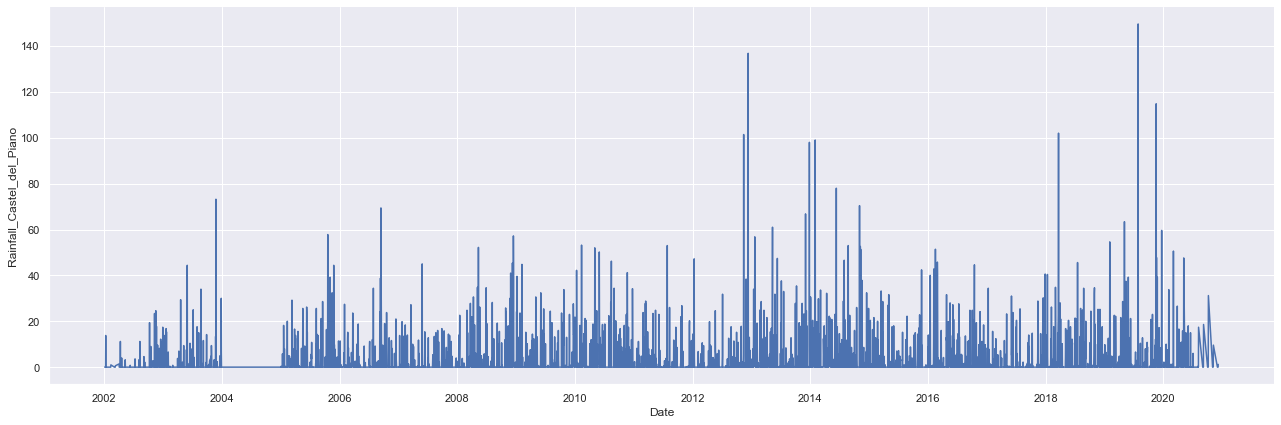

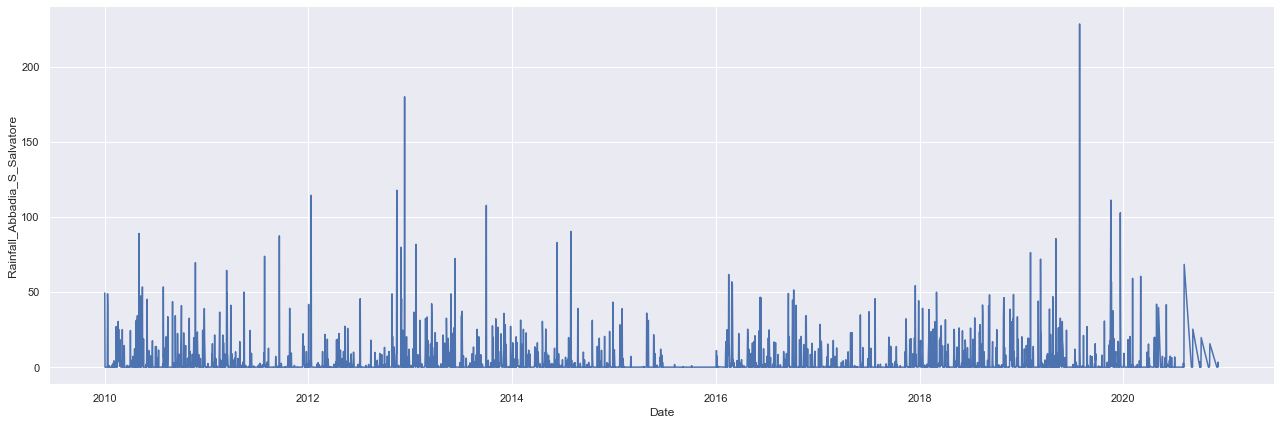

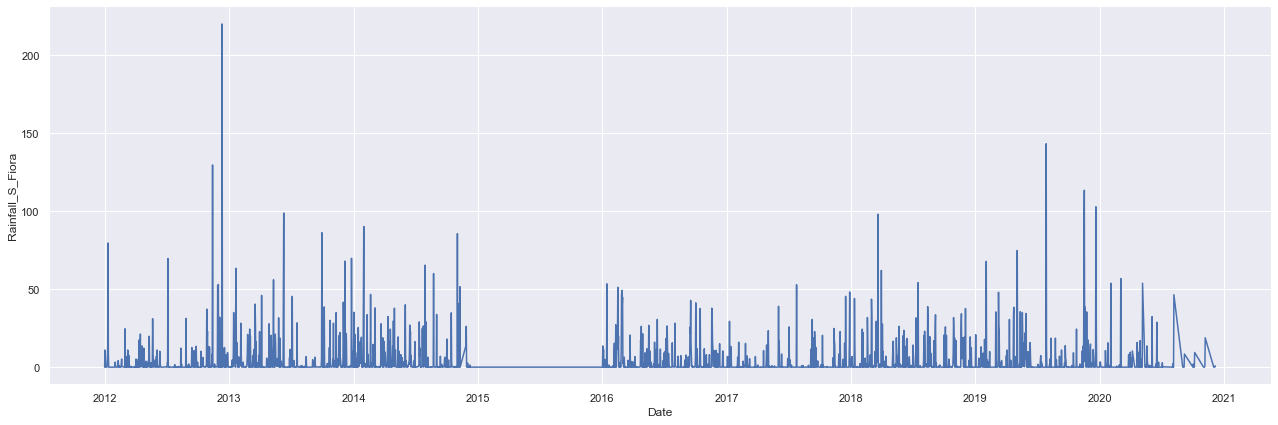

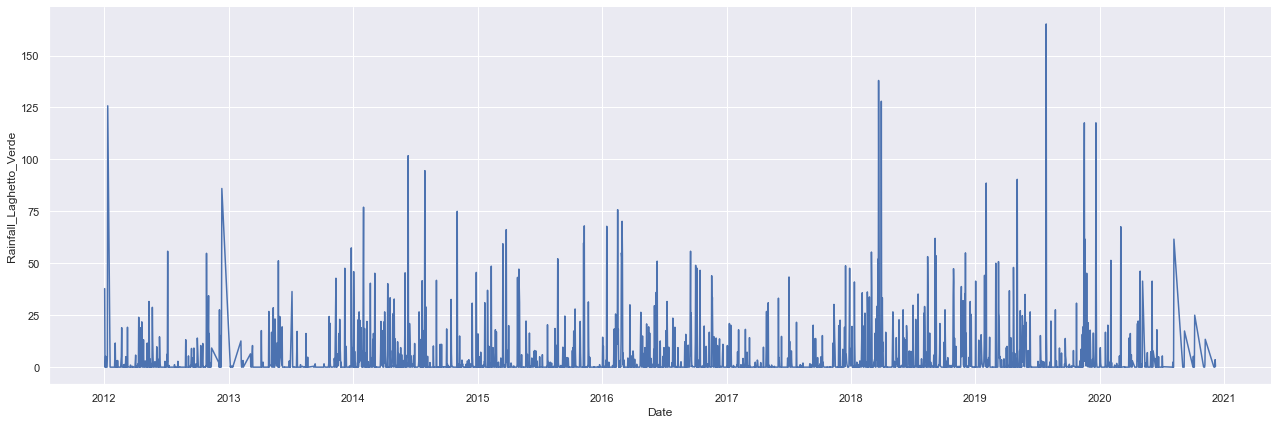

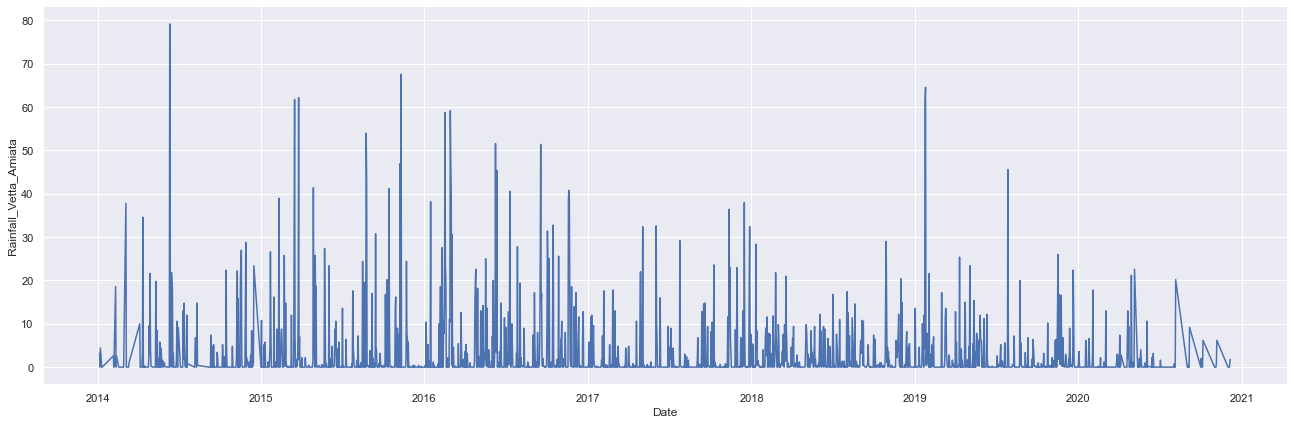

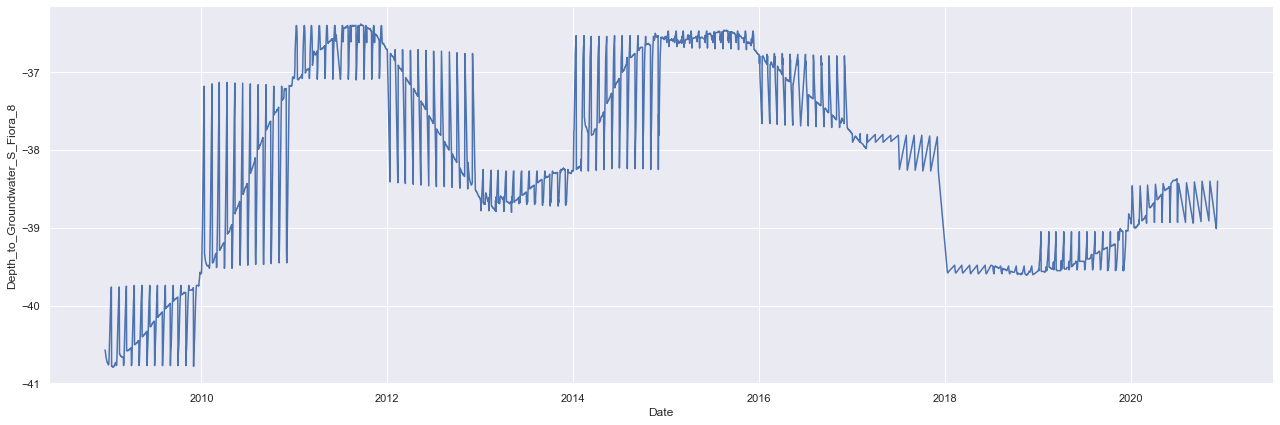

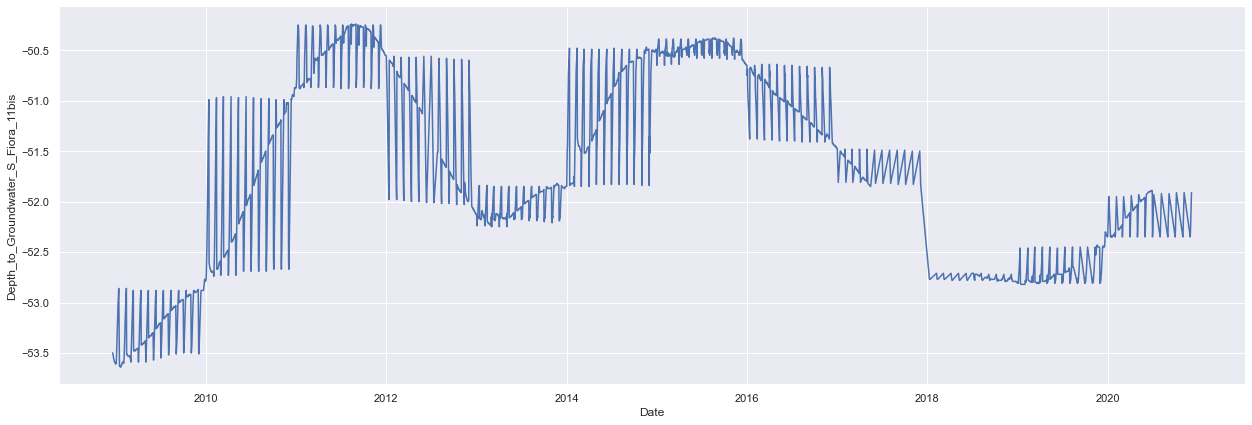

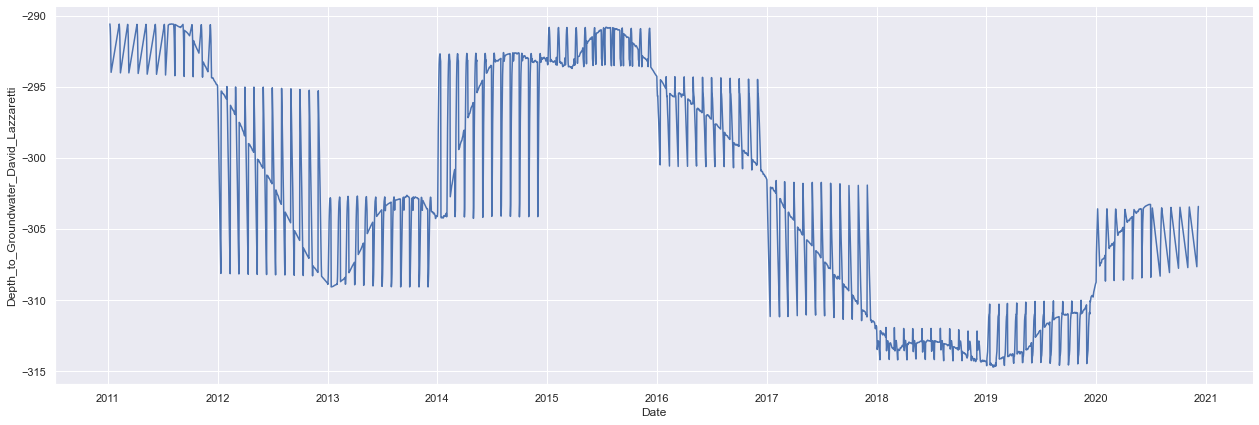

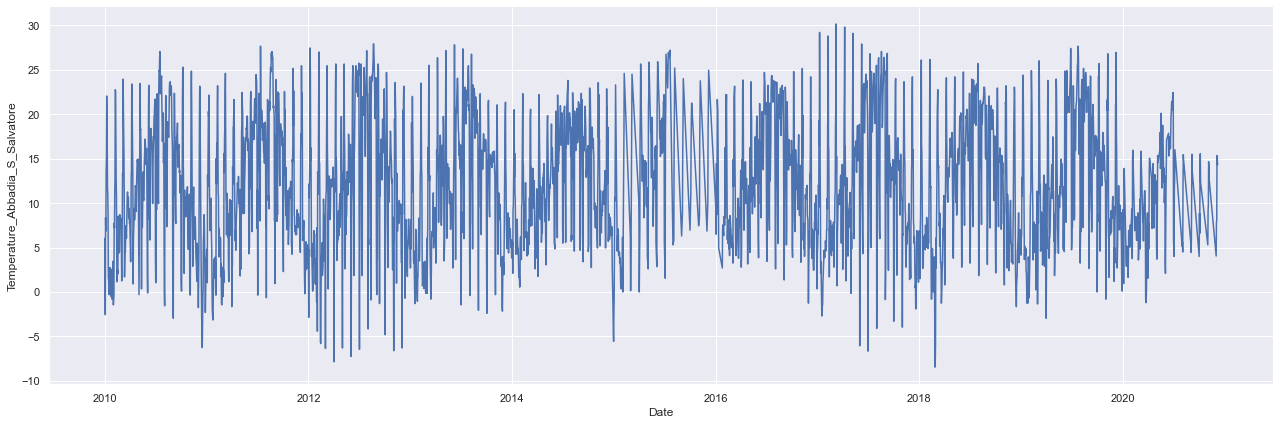

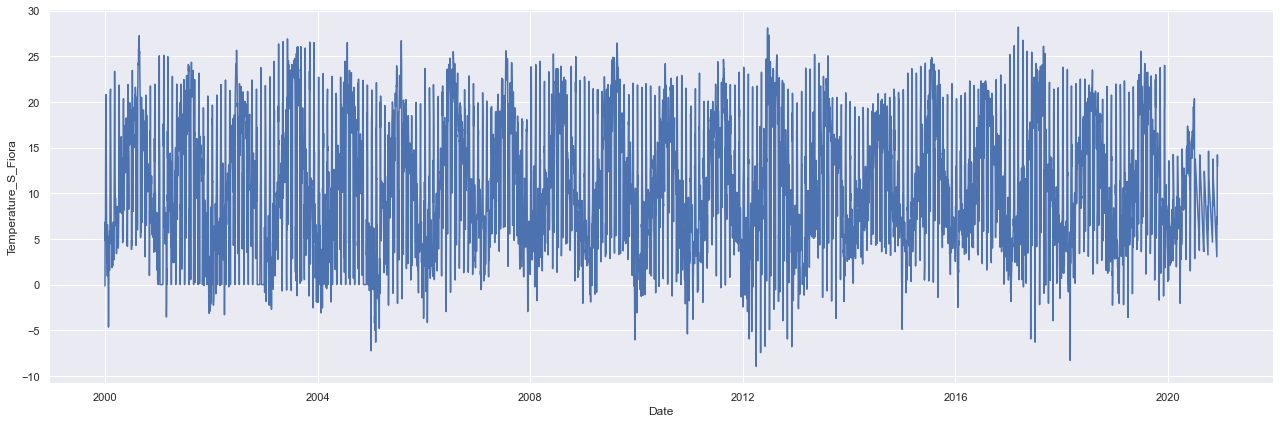

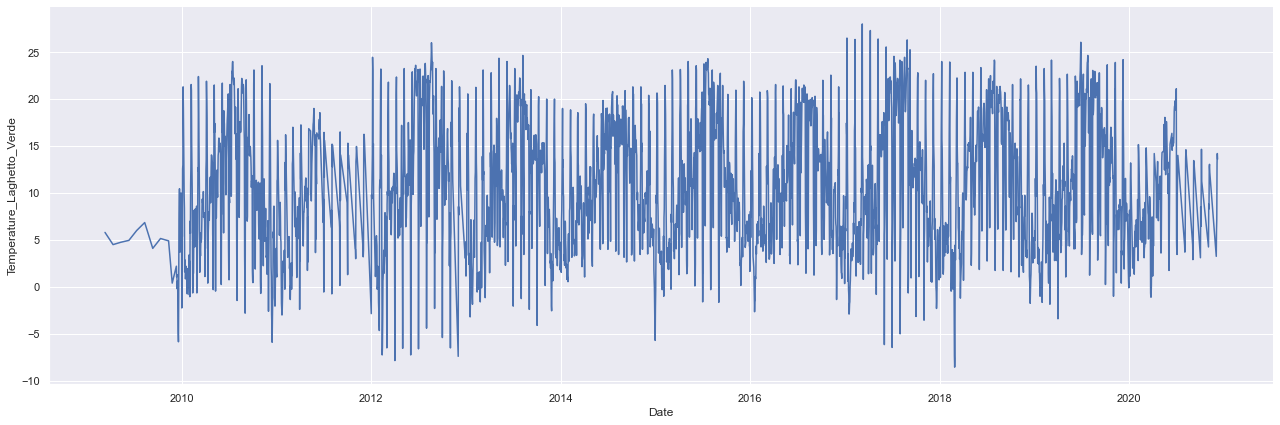

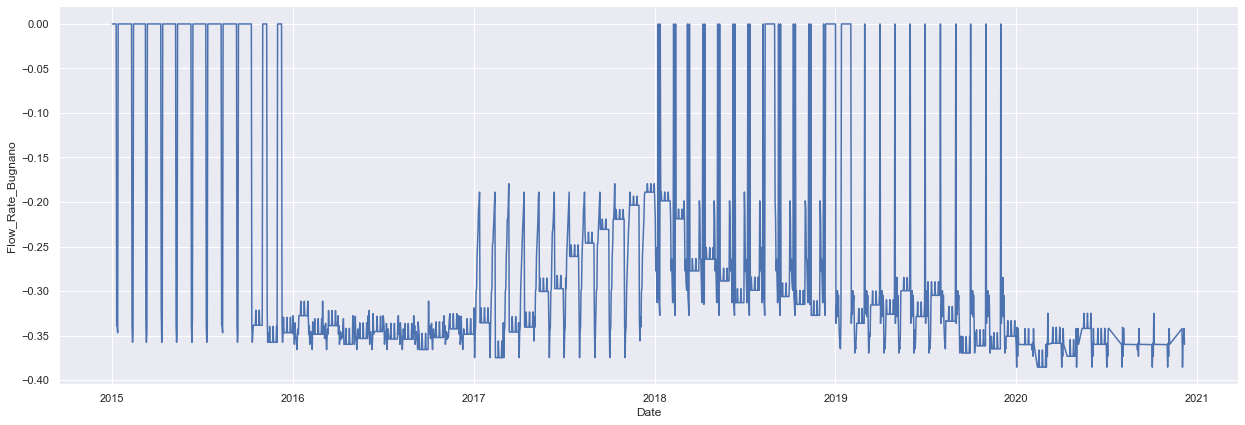

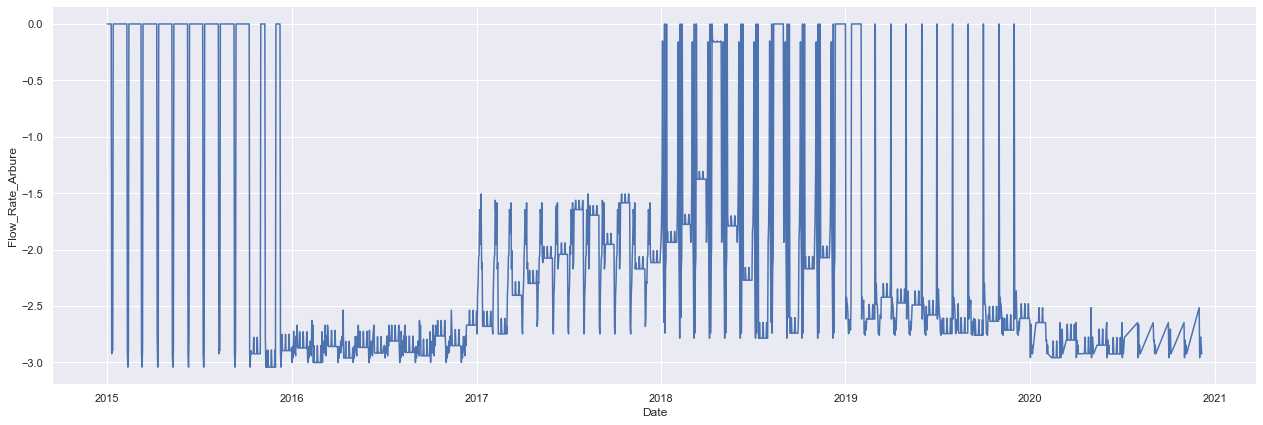

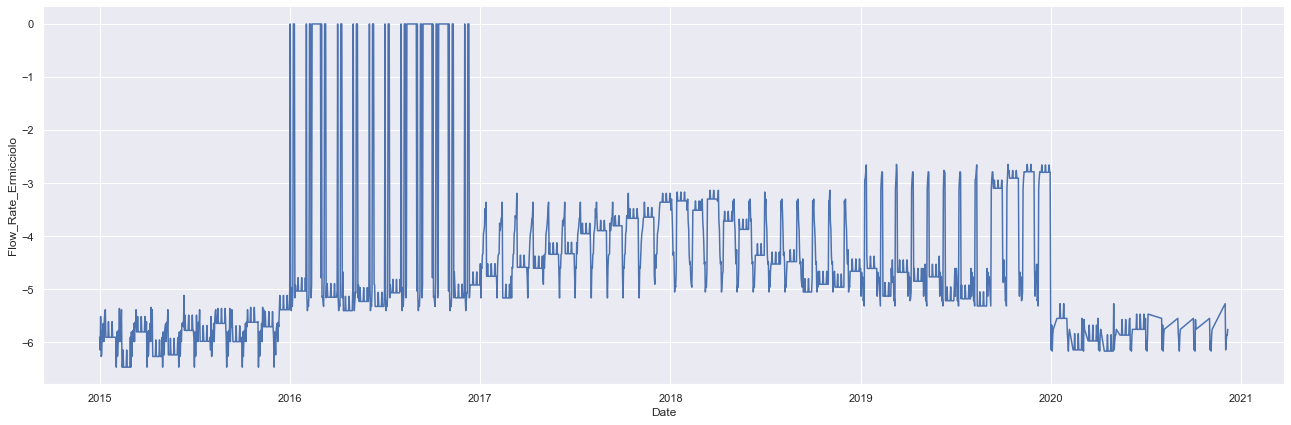

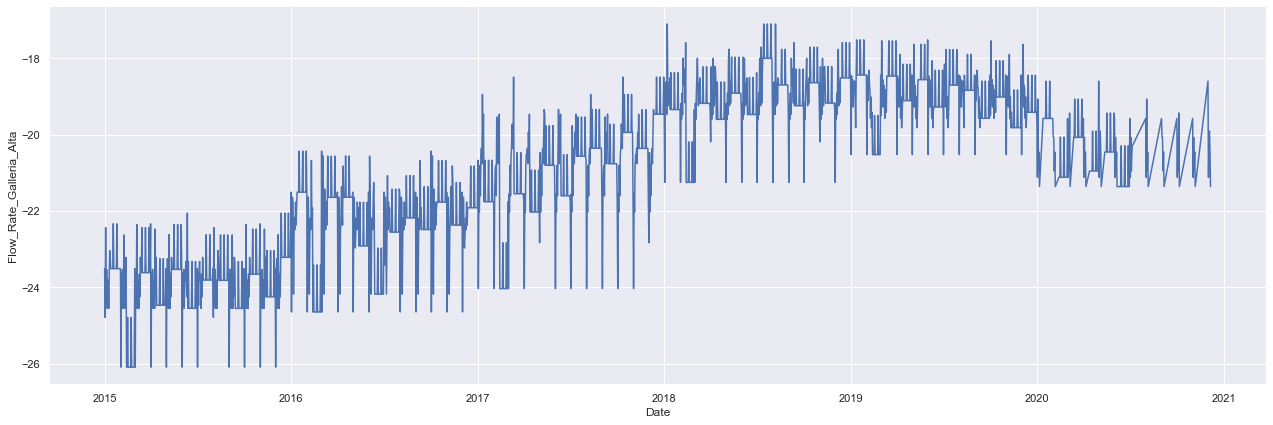

In [20]:
cols = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
for i in cols:
    df = df.asfreq('D')
    g = sns.relplot(data = df, x = df.index, y = df[str(i)], kind = 'line')
    g.fig.set_figwidth(20)
    g.fig.set_figheight(6)
    plt.show()

---
* Having observed that more of the non-zero ```Rainfall``` feature values begin from year 2012, we will slice the dataset and zoom into these years with the Relplot again to have a view of the rainfall patterns across the cities/acqueduct areas.
---

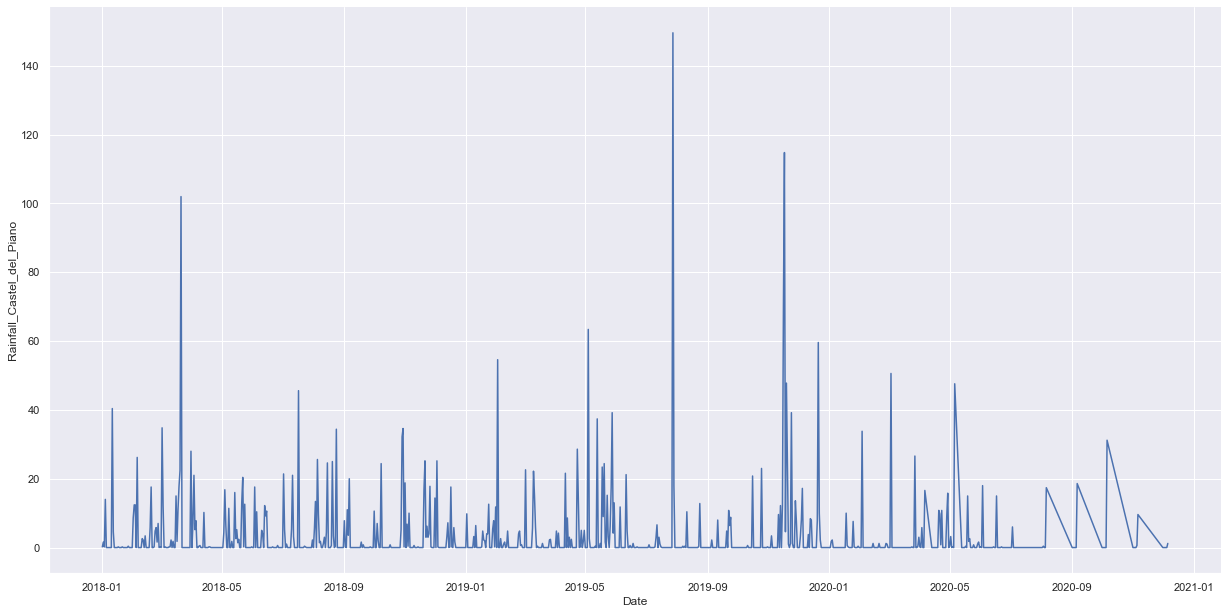

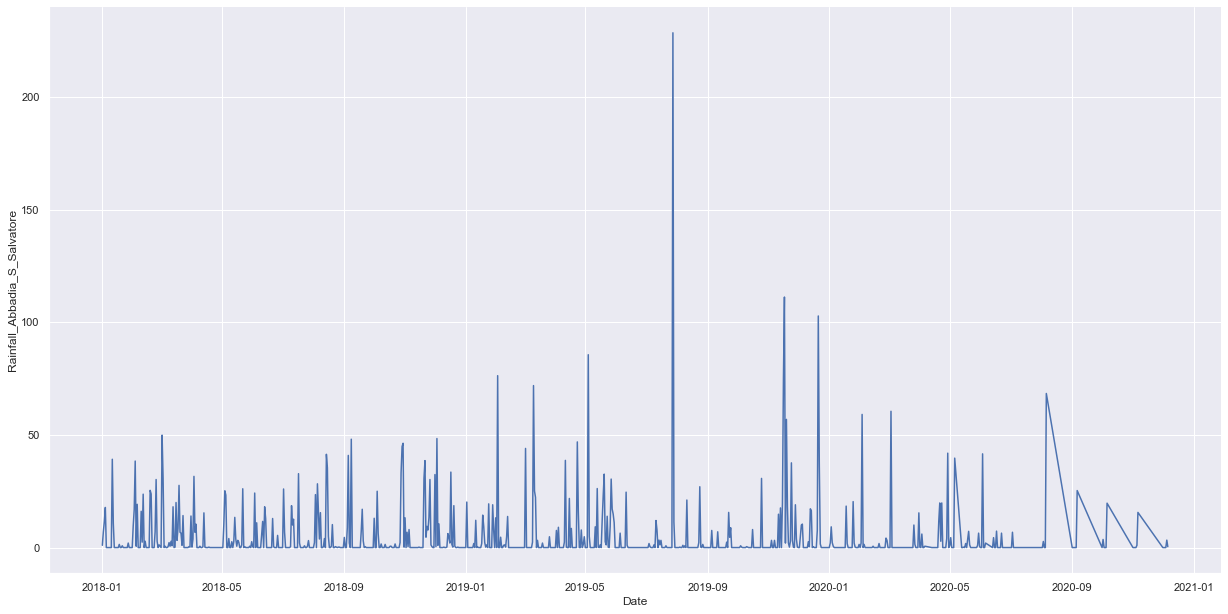

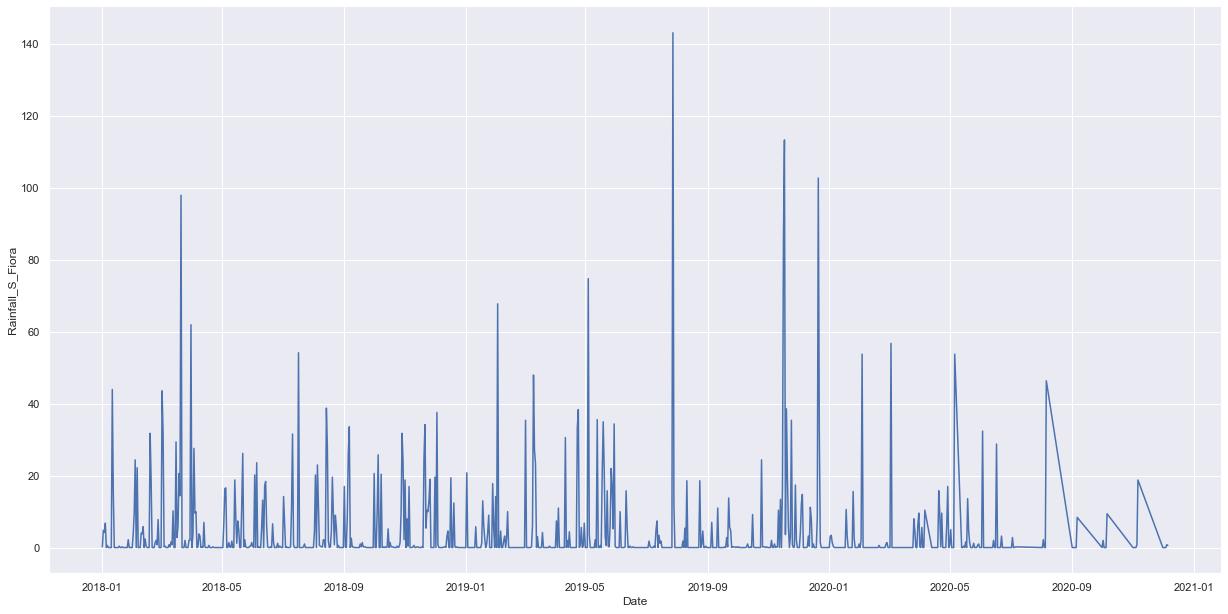

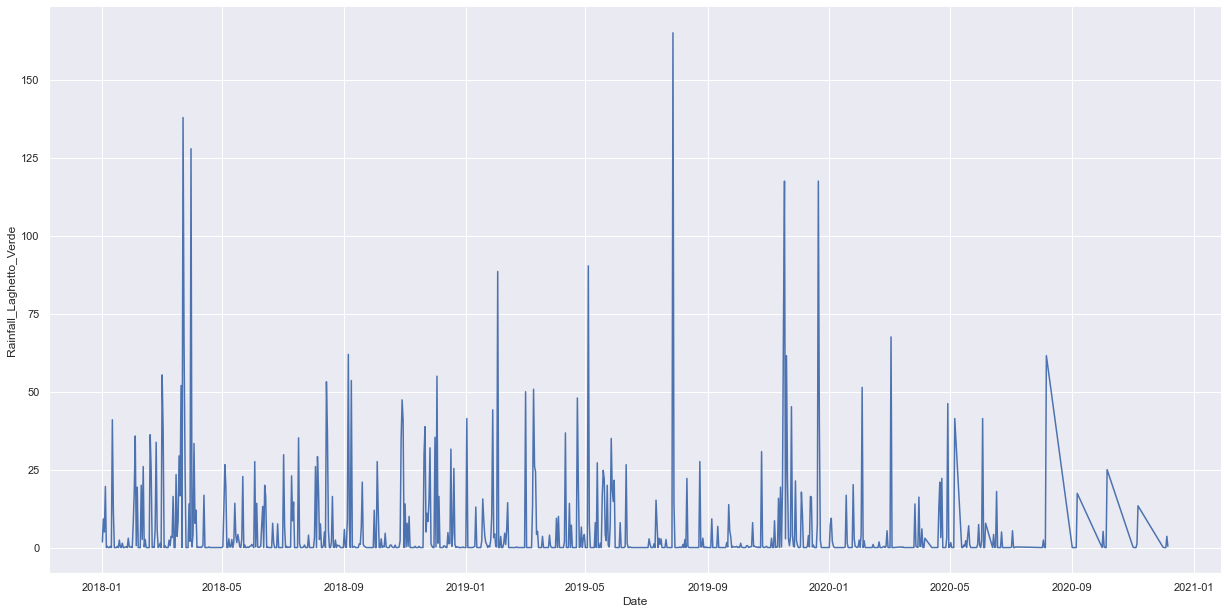

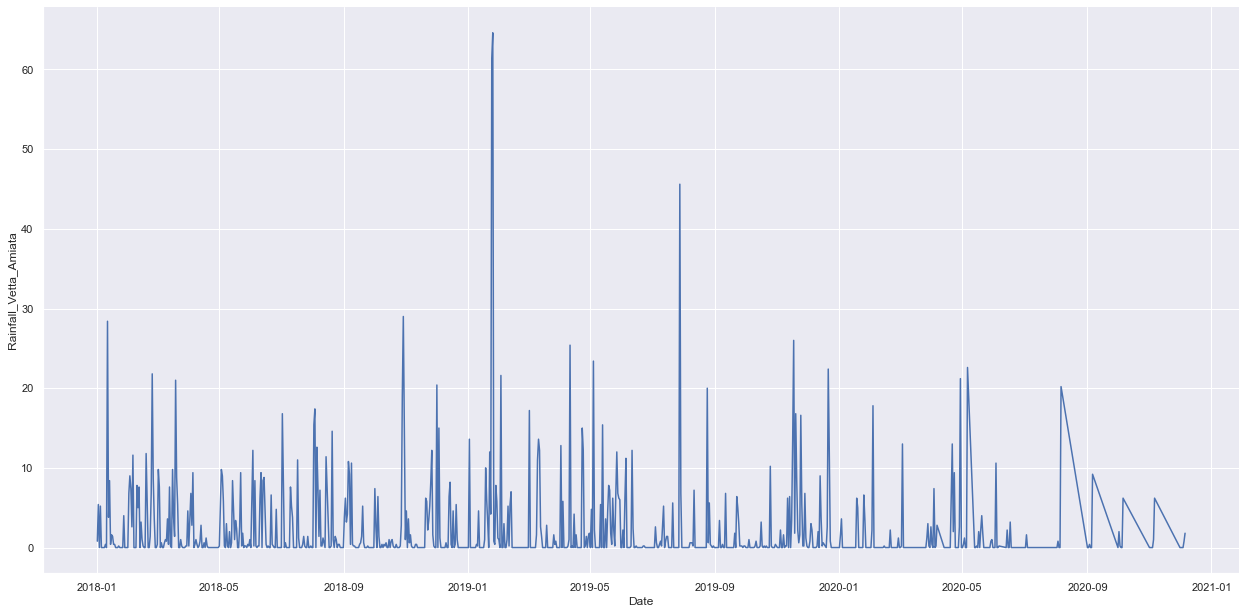

In [21]:
#Listing the rainfall columns to filter
#a dataframe of rainfall features above year 2015
rainfall = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata']

df_rain = df[df['year']>=2018][rainfall]

#Create an iteration through the days for rainfall plots with frequency in DAYS
for i in rainfall:
    df_rain = df_rain.asfreq('D')
    g = sns.relplot(data = df_rain, x = df_rain.index, y = df_rain[str(i)], kind = 'line')
    g.fig.set_figwidth(20)
    g.fig.set_figheight(9)
    plt.show()

* It is important to see that the rainfall patterns across the cities around the different acqueducts are similar.

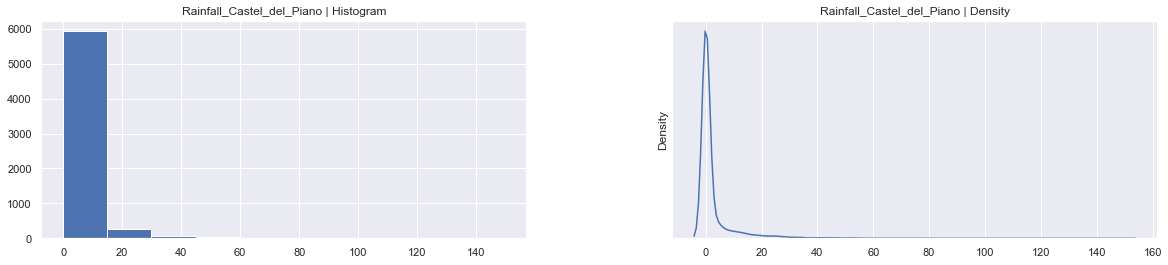

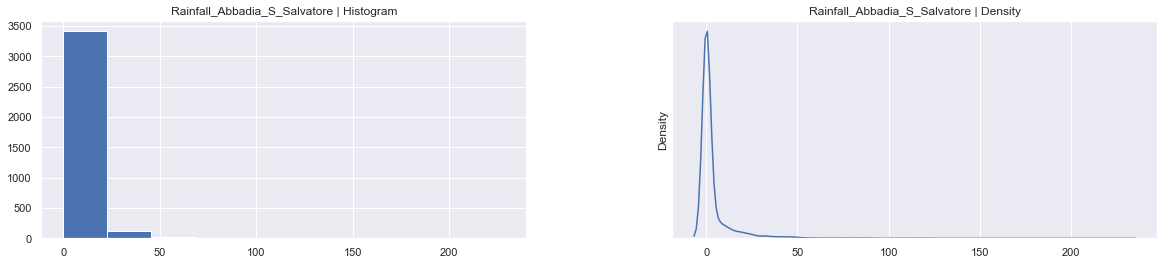

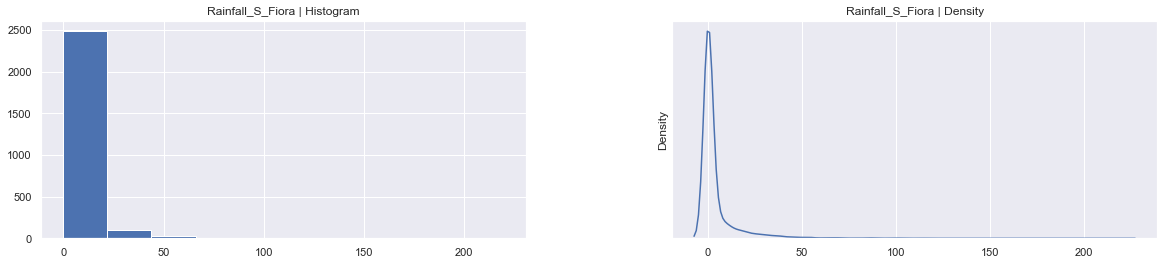

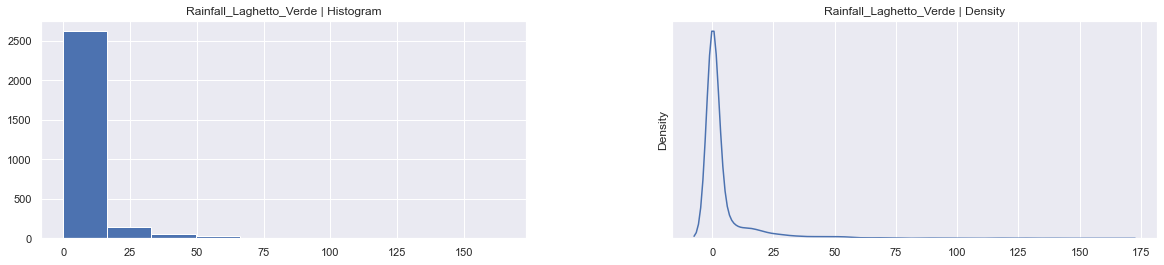

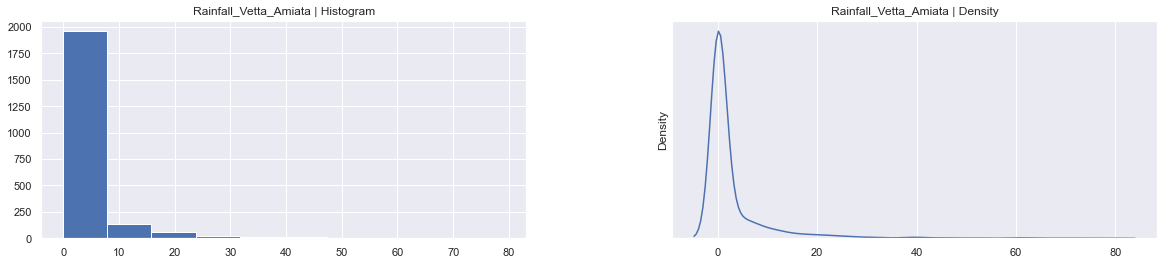

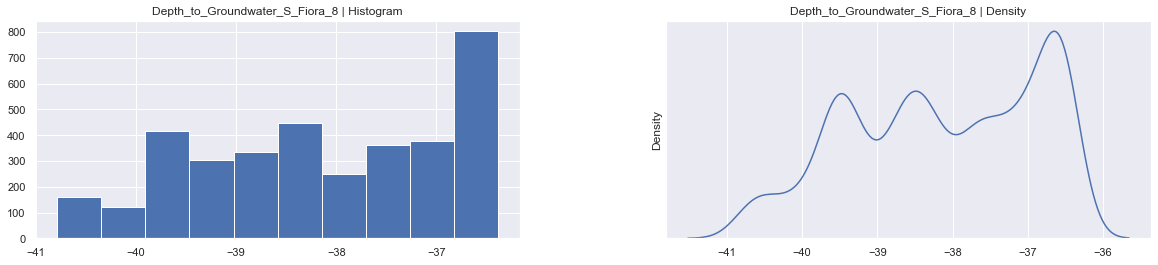

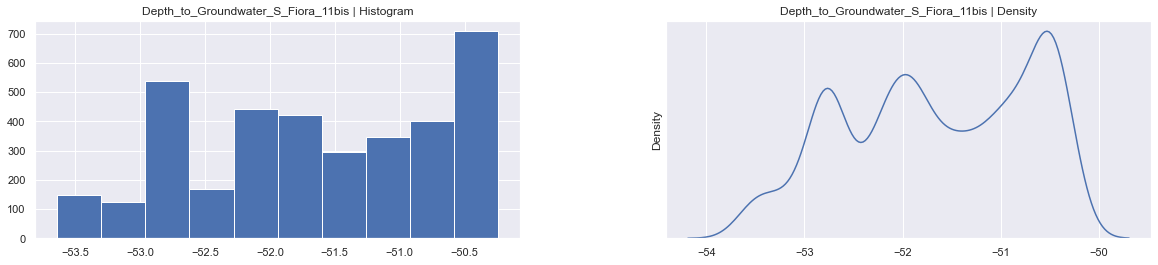

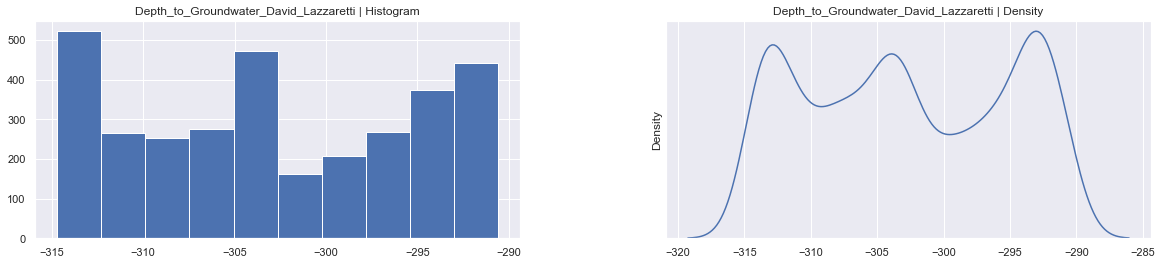

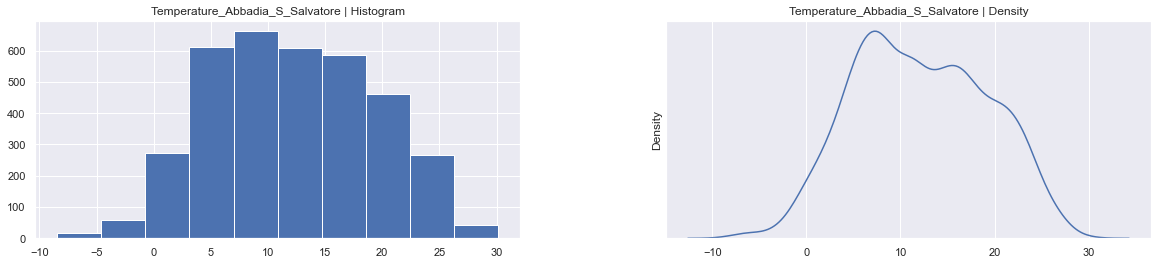

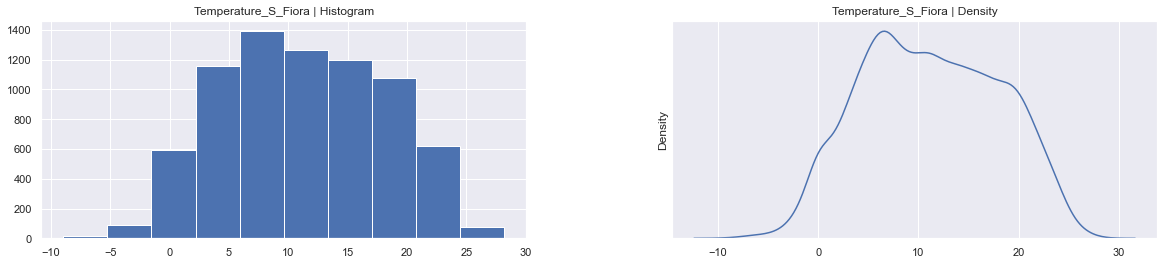

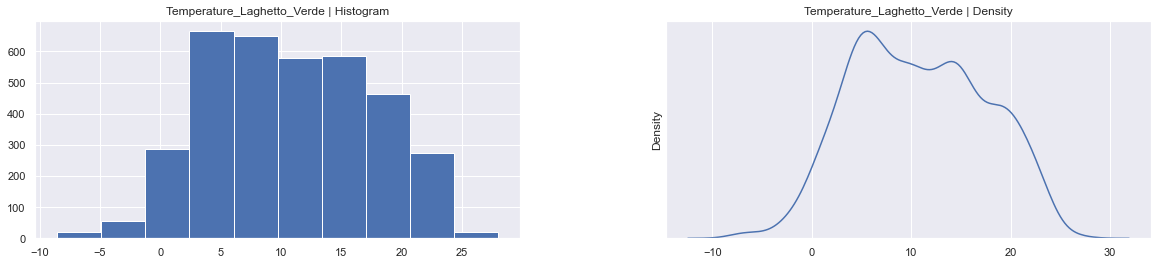

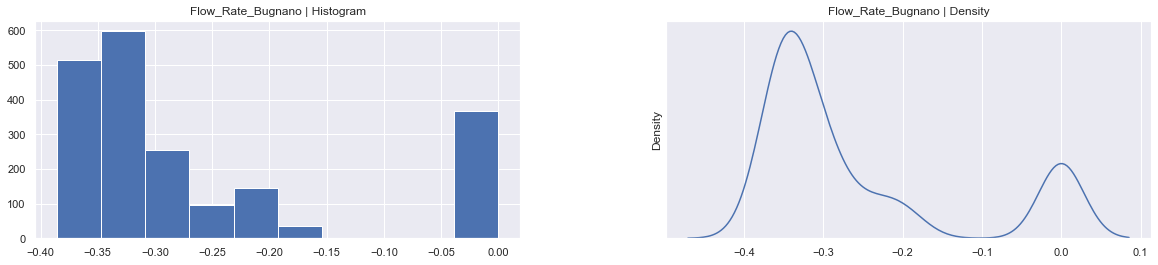

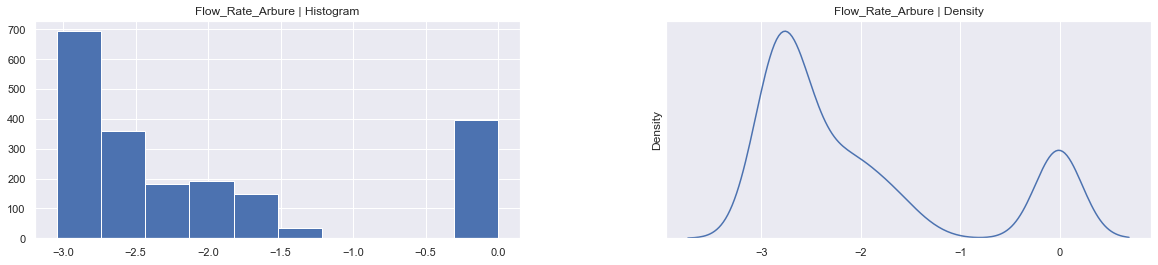

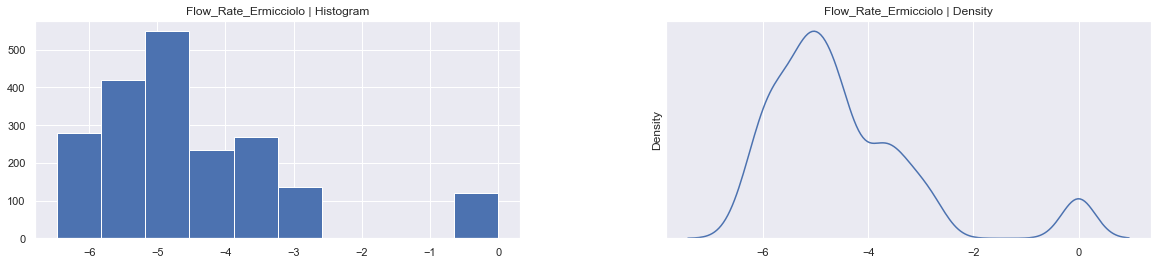

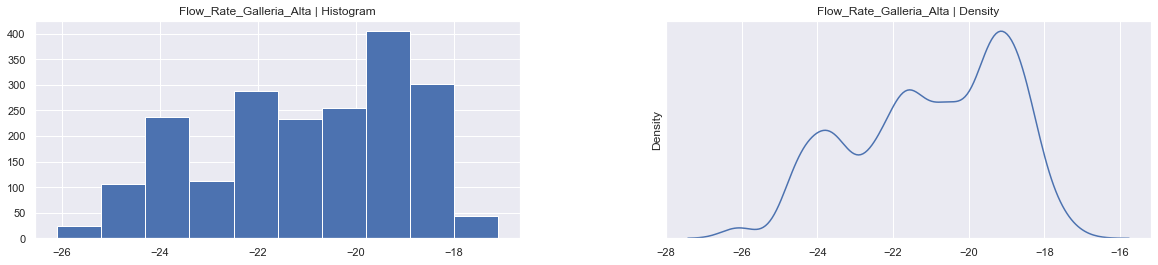

In [22]:
for i in cols:
    fig, axes = plt.subplots(1, 2, figsize = (20, 4))
    df.hist(str(i), bins = 10, ax=axes[0])
    try: 
        sns.kdeplot(np.array(df[str(i)]))
    except: ValueError
        
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Density")
    plt.show()

---
* All the features produce a fair normal distribution of values except for the _Rainfall_ features with huge skews to the right, and extreme high values.

* There were more days without rainfall, than there were with rainfall.

---

#### Correlation Plot for the Features

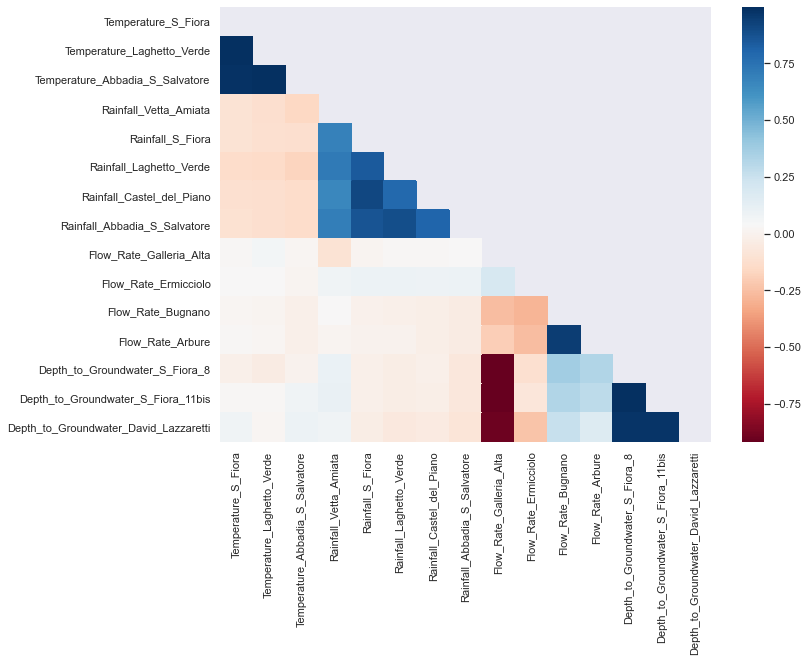

In [23]:
cols = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
cols.sort(reverse=True)

# creating mask
mask = np.triu(np.ones_like(df[cols].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[cols].corr(), cmap="RdBu", annot=False, mask=mask)
 
# displaying heatmap
#plt.show()

---
* Slight collinearity observed between the ```Temperature_Laghetto_Verde``` and ```Temperature_S_Fiora``` features.

* Also, ```Flow_Rate_Galleria_Alta``` strongly correlates with the ```Depth_to_Groundwater*``` features. Feature selection by correlation will be considered.
---

#### *How Many Features Contain Negative Values?*

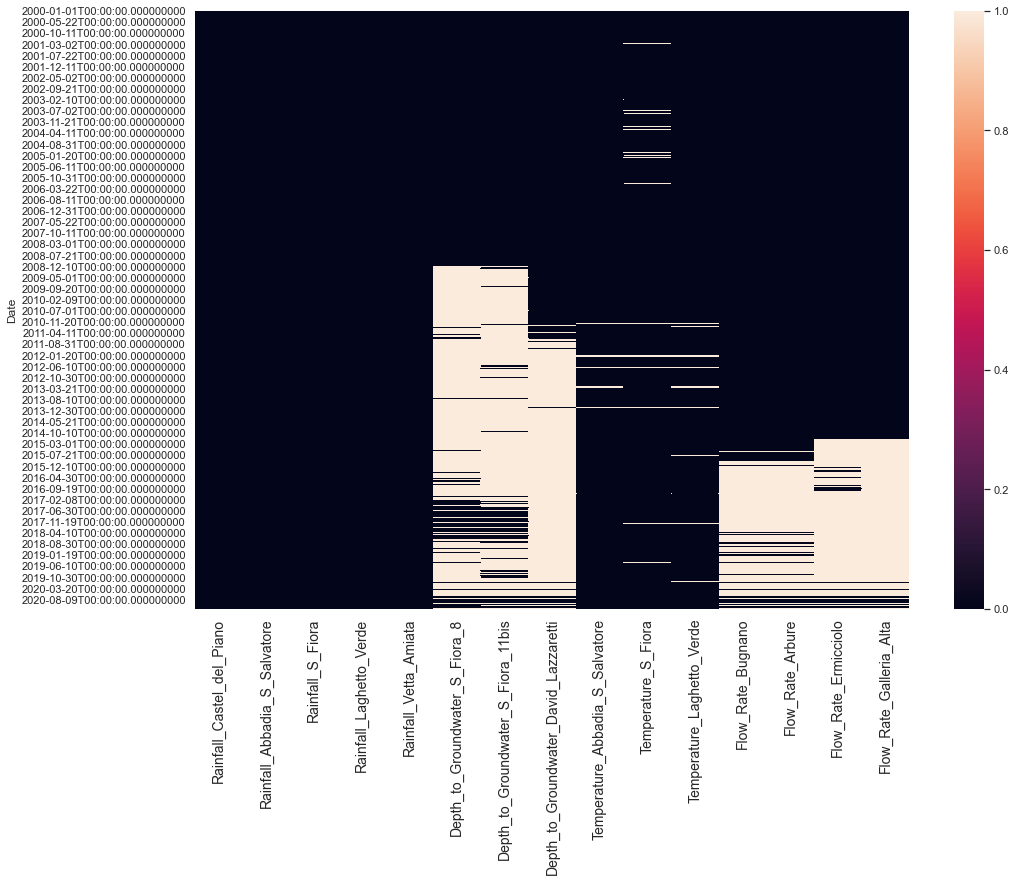

In [24]:
#Inspecting columns with negative values

coln = [col for col in df.columns if col not in ['year', 'month']]
fig, ax = plt.subplots(figsize= (16, 11))
sns.heatmap(df[coln] < 0)
plt.tick_params(axis='x', which='major', labelsize=14)

#display((df<0)/len(df))

---
 - Almost all the recorded _Flowrate_ values are negative.
 - Absolute values will be assumed for the feature values at feature engineering and modelling.
---

#### Observe a Monthly Trend for all the Feature Categories

In [25]:
#FlowRate features

Flows = []
for col in df.columns:
    if 'Flow'in col:
        Flows.append(col)
#Rain ditribution over the year
flow_month= df.groupby(["month"])[Flows].mean().reset_index()
flow_month.head()

,month,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,1.0,-0.223201,-1.798968,-4.710886,-20.696613
1,2.0,-0.270368,-2.116001,-4.415637,-22.074255
2,3.0,-0.266605,-1.979002,-4.742281,-20.738839
3,4.0,-0.269410,-1.874001,-4.898079,-21.092324
4,5.0,-0.261271,-2.002427,-4.826797,-20.804604


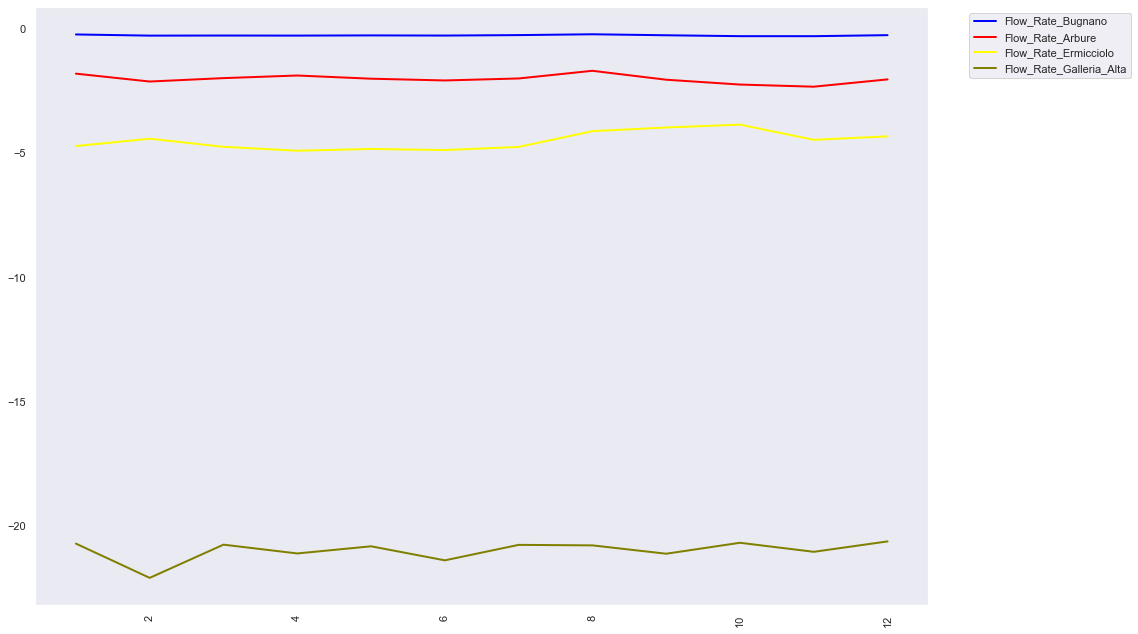

In [26]:
fig, ax = plt.subplots(figsize= (16, 11))
plt.plot( 'month', 'Flow_Rate_Bugnano', data=flow_month, marker='', color='blue', linewidth=2)
plt.plot( 'month', 'Flow_Rate_Arbure', data=flow_month, marker='', color='red', linewidth=2)
plt.plot( 'month', 'Flow_Rate_Ermicciolo', data=flow_month, marker='', color='yellow', linewidth=2)
plt.plot( 'month', 'Flow_Rate_Galleria_Alta', data=flow_month, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

**Observation**
1. The Galleria_Alta has the maximum flow volume, while Bugano is the lowest with a near-zero mean flowrate for each month. 
2. July to August period is the relatively dry period where there is consistent minimum rain.
3. All the waters bodies have negative flowrates.
___

In [27]:
#Rainfall features

Falls = []
for col in df.columns:
    if 'Rain' in col:
        Falls.append(col)

#Rain ditribution over the year
rain_month= df.groupby(["month"])[Falls].mean().reset_index()
rain_month.head()

,month,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata
0,1.0,2.838185,3.822930,4.454622,4.775104,2.610811
1,2.0,2.693776,4.593262,4.302370,5.308444,4.028571
2,3.0,2.680151,3.730844,4.382427,5.860163,2.929032
3,4.0,2.209416,3.125714,3.391304,3.923770,2.415228
4,5.0,2.974499,4.216564,4.389121,4.661132,2.521569


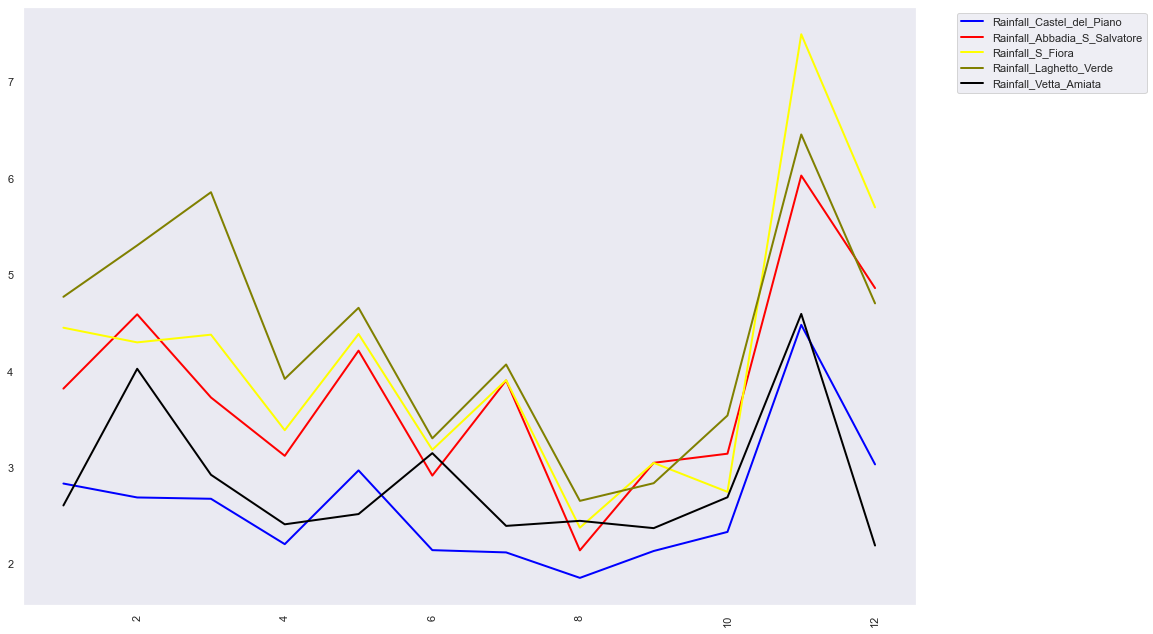

In [28]:
fig, ax = plt.subplots(figsize= (16, 11))
plt.plot( 'month', 'Rainfall_Castel_del_Piano', data=rain_month, marker='', color='blue', linewidth=2)
plt.plot( 'month', 'Rainfall_Abbadia_S_Salvatore', data=rain_month, marker='', color='red', linewidth=2)
plt.plot( 'month', 'Rainfall_S_Fiora', data=rain_month, marker='', color='yellow', linewidth=2)
plt.plot( 'month', 'Rainfall_Laghetto_Verde', data=rain_month, marker='', color='olive', linewidth=2)
plt.plot( 'month', 'Rainfall_Vetta_Amiata', data=rain_month, marker='', color='black', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

**Observation**
1. Rainfall peaks in the 11th month of every year.
2. Fiora and Laghetto_Verde receive the highest rainfall across the year.
3. July to August period is the relatively dry period where there is consistent minimum rain.
4. September to March is the time when its raining to a decent level.
___

In [29]:
#Groundwater features

Groundwater = []
for col in df.columns:
    if 'Ground'in col:
        Groundwater.append(col)
#Rain ditribution over the year
groundwater_month= df.groupby(["month"])[Groundwater].mean().reset_index()
groundwater_month.head()

,month,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti
0,1.0,-38.215418,-51.726130,-303.300540
1,2.0,-38.180276,-51.709392,-303.184291
2,3.0,-38.164393,-51.699387,-303.096942
3,4.0,-38.137729,-51.687310,-302.902491
4,5.0,-38.202545,-51.658990,-302.753430


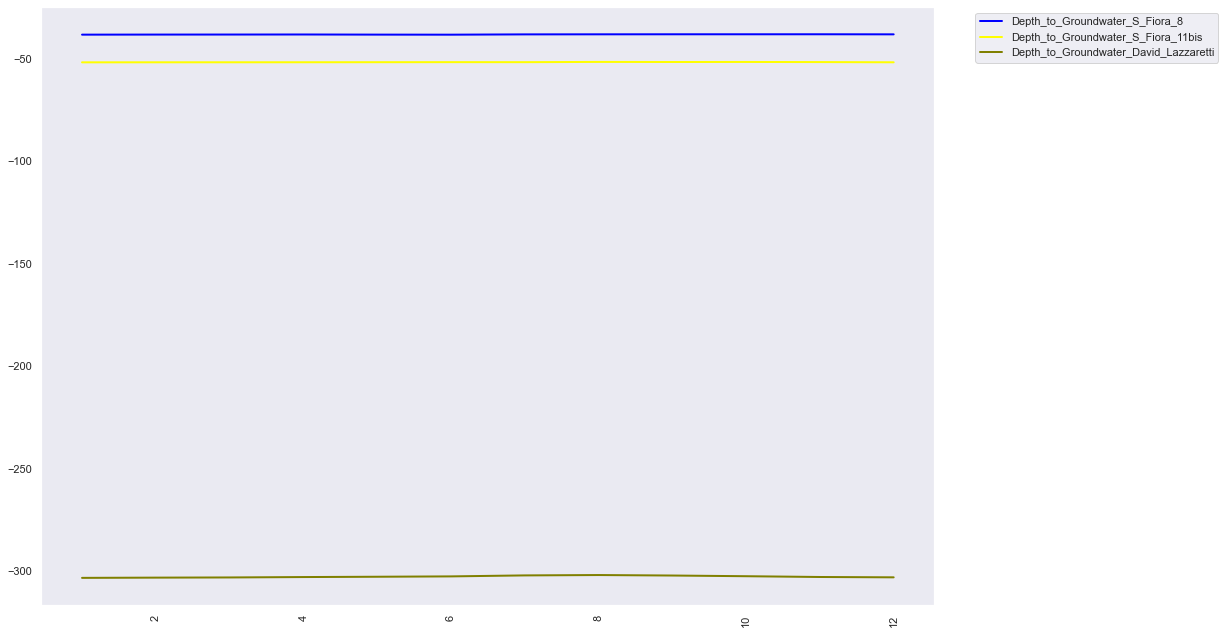

In [30]:
fig, ax = plt.subplots(figsize= (16, 11))
plt.plot( 'month', 'Depth_to_Groundwater_S_Fiora_8', data=groundwater_month, marker='', color='blue', linewidth=2)
plt.plot( 'month', 'Depth_to_Groundwater_S_Fiora_11bis', data=groundwater_month, marker='', color='yellow', linewidth=2)
plt.plot( 'month', 'Depth_to_Groundwater_David_Lazzaretti', data=groundwater_month, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

**Observation**
1. S_Fiora is closest to its groundwater having the least Mean of Depth_to_groundwater.
2. David_Lazzaretti has the highest distance to its groundwater.
___

In [33]:
#Temperature features

Temperatures = []
for col in df.columns:
    if 'Temperature'in col:
        Temperatures.append(col)
#Rain ditribution over the year
temperatures_month= df.groupby(["month"])[Temperatures].mean().reset_index()
temperatures_month.head()

,month,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde
0,1.0,6.666401,6.160233,5.505124
1,2.0,7.868214,7.127466,6.580976
2,3.0,9.535552,8.860388,8.202591
3,4.0,11.661867,10.798397,10.433596
4,5.0,13.309663,12.933953,12.141768


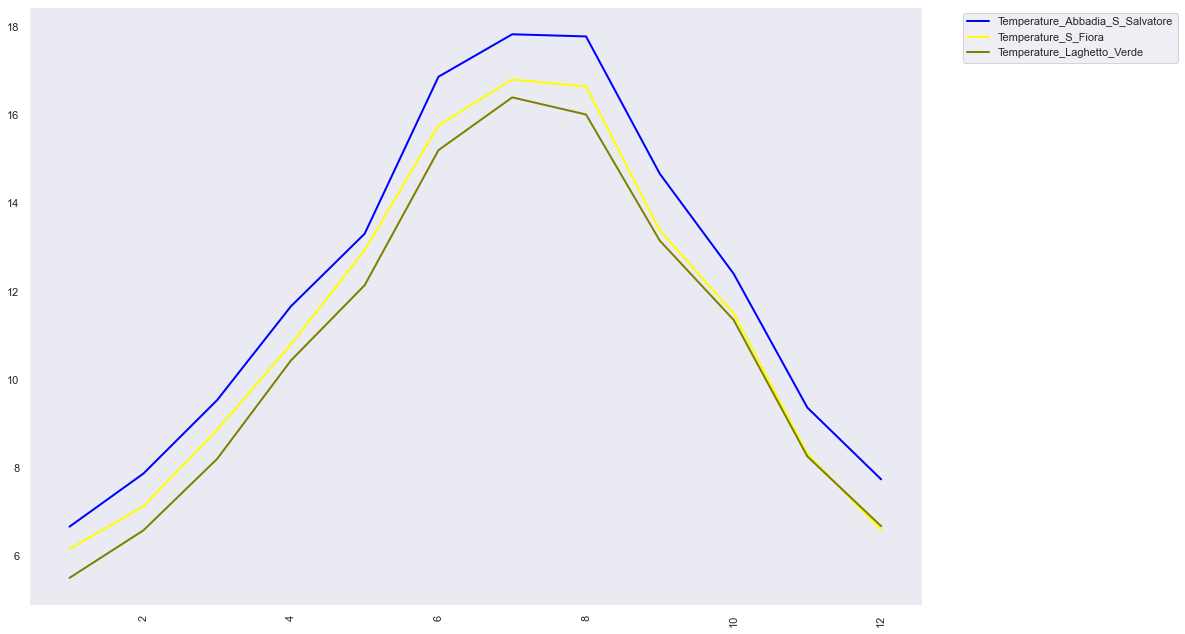

In [32]:
fig, ax = plt.subplots(figsize= (16, 11))
plt.plot( 'month', 'Temperature_Abbadia_S_Salvatore', data=temperatures_month, marker='', color='blue', linewidth=2)
plt.plot( 'month', 'Temperature_S_Fiora', data=temperatures_month, marker='', color='yellow', linewidth=2)
plt.plot( 'month', 'Temperature_Laghetto_Verde', data=temperatures_month, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

**Temperature Observations**
1. In all the cities, it is hottest in July and coldest in January.
2. Laghetto_Verde is the coldest of the three locations.
___

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">4. Feature Engineering ⚙️⚙️</p>

**Feature Engineering Scheme**
1. Create more date time features, and encode the cyclical features. 
2. Drop all NaN rows.
3. Subset dataframes for the different outputs for model building.

In [38]:
#Create more date object features

df.reset_index(inplace=True)

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df.set_index('Date', inplace = True)

df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,year,month,day,day_of_year,week_of_year,quarter,season
Date,,,,,,,
2000-01-01,2000,1,1,1,52,1,1
2000-01-02,2000,1,2,2,52,1,1
2000-01-03,2000,1,3,3,1,1,1
2000-01-04,2000,1,4,4,1,1,1
2000-01-05,2000,1,5,5,1,1,1


#### Encoding Cyclical Features

___
* The purpose of ending is to ensure that that seasonal nature of the date object columns do not confuse the model to be applied
___

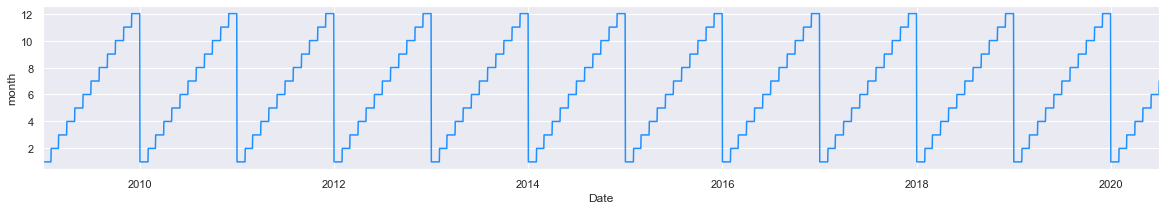

In [40]:
#Creating a view for the cyclic month feauture
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.index, y=df['month'], color='dodgerblue')
ax.set_xlim([dt.date(2009, 1, 1), dt.date(2020, 6, 30)])
plt.show()

** The new time features are cyclical around the month especially. For example, the feature month cycles between 1 and 12 for every year, with an increments of 1 within the year. This results in a -11 difference, which can confuse a lot of models.

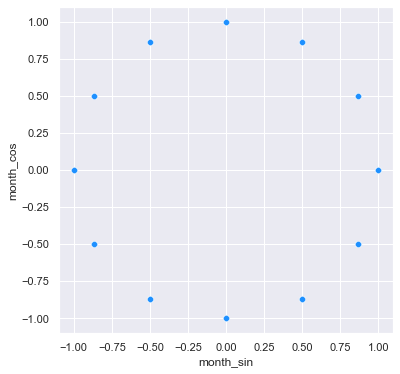

In [41]:
#Encoding the cyclic feature
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

#### Cleaning for Null Values

___

* All rows before year 2015 will be dropped.
* For other columns with sparing Null values, the interpolate method will be used to fillna
___

In [42]:
# #Slice out years with predominantly null values between year 2000 to 2015
# df = df[df['year']>2015]

# #Interpolate to fill NaNs using the default method
# for i in df.columns:
#     df[i] = df[i].interpolate()

#Drop any possible remaining rows with NaNs
df.dropna(inplace=True)

In [43]:
#Defining the dataframe with the different output variables
df1 = df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
        'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Arbure']]
df2 = df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
        'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano']]
df3 = df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
        'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Ermicciolo']]
df4 = df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
        'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Galleria_Alta']]

In [140]:
#FlowRate features
Arbure = [] + ['Flow_Rate_Arbure']
for col in df.columns:
    if 'Flow' not in col:
        Arbure.append(col)
df[Arbure]# + ['Flow_Rate_Arbure']

,Flow_Rate_Arbure,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,year,month,day,day_of_year,week_of_year,quarter,season
Date,,,,,,,,,,,,,,,,,,,
2016-01-26,-2.872341,0.0,0.0,0.0,0.0,0.0,-36.87,-50.73,-294.94,7.05,7.60,4.65,2016,1,26,26,4,1,1
2016-01-27,-2.872341,0.0,0.0,0.2,0.0,0.0,-36.87,-50.74,-294.98,7.55,8.10,6.70,2016,1,27,27,4,1,1
2016-01-28,-2.872341,0.0,0.0,0.0,0.0,0.0,-36.88,-50.74,-295.02,6.85,5.80,5.55,2016,1,28,28,4,1,1
2016-01-29,-2.872341,0.0,0.0,0.0,0.0,0.0,-36.88,-50.74,-295.06,6.75,7.80,5.05,2016,1,29,29,4,1,1
2016-01-30,-2.872341,0.0,0.0,0.0,0.0,0.0,-36.89,-50.75,-295.09,6.35,5.95,4.60,2016,1,30,30,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,-2.925253,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.70,18.30,19.20,2020,6,26,178,26,2,3
2020-06-27,-2.925253,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.50,17.95,18.85,2020,6,27,179,26,2,3
2020-06-28,-2.778991,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,22.10,19.90,20.45,2020,6,28,180,26,2,3


In [44]:
#Check if null values still exist
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 923 entries, 2016-01-02 to 2020-12-06
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rainfall_Castel_del_Piano              923 non-null    float64
 1   Rainfall_Abbadia_S_Salvatore           923 non-null    float64
 2   Rainfall_S_Fiora                       923 non-null    float64
 3   Rainfall_Laghetto_Verde                923 non-null    float64
 4   Rainfall_Vetta_Amiata                  923 non-null    float64
 5   Depth_to_Groundwater_S_Fiora_8         923 non-null    float64
 6   Depth_to_Groundwater_S_Fiora_11bis     923 non-null    float64
 7   Depth_to_Groundwater_David_Lazzaretti  923 non-null    float64
 8   Temperature_Abbadia_S_Salvatore        923 non-null    float64
 9   Temperature_S_Fiora                    923 non-null    float64
 10  Temperature_Laghetto_Verde             923 non-null    

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">5. Modelling 🧩</p>

In [45]:
# Split the dataset into the response, y, and features, X for the first output
y = df1['Flow_Rate_Arbure']
X = df1.drop('Flow_Rate_Arbure', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Instantiate a RandomForest Regressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)

# Evaluating R^2 and RMSE values
MSE = mean_squared_error(pred_forest, y_test)
R2 = r2_score(pred_forest, y_test)
MAE = mean_absolute_error(pred_forest, y_test)

#Checking the metrics
print("R^2 = ", R2, " \nMSE = " , MSE, " \nMAE = " , MAE)

R^2 =  0.8276055200679696  
MSE =  0.05322695704054237  
MAE =  0.08337064161113565


* Checking the readiness of the dataset for modelling using the Random Forest Regressor model.
* A visual of the prediction result of the test size is also imposed on the test size in the following line chart.

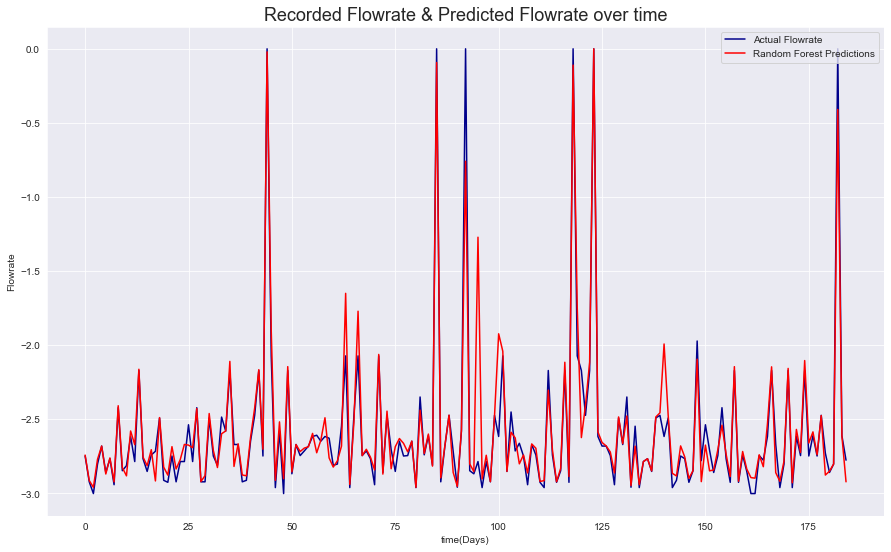

In [75]:
#Creating a plot that compares actual y_val with AdaBoost Predicted values
fig = plt.figure(figsize =(15, 9))
plt.plot(np.arange(len(y_test)), y_test, color='darkblue', label = 'Actual Flowrate')
plt.plot(np.arange(len(y_test)), pred_forest, color="red", label = 'Random Forest Predictions')
plt.title("Recorded Flowrate & Predicted Flowrate over time", fontsize=18)

plt.xlabel("time(Days)")
plt.ylabel("Flowrate")
plt.legend(loc='upper right')
plt.show()

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,MAE,Train Time
Regressor,,,,,
Linear Regression,0.317707,0.285784,0.534588,0.314915,0.002287
Decision Tree Regressor,0.735799,0.110663,0.332660,0.086918,0.008795
Support Vector Regressor,-0.079661,0.452225,0.672476,0.315240,0.029216
XG Regressor,0.889588,0.046247,0.215051,0.081924,0.185662
AdaBoost,0.805593,0.081429,0.285357,0.156792,0.137240
Random Forest Regressor,0.866263,0.056017,0.236679,0.079371,0.584479


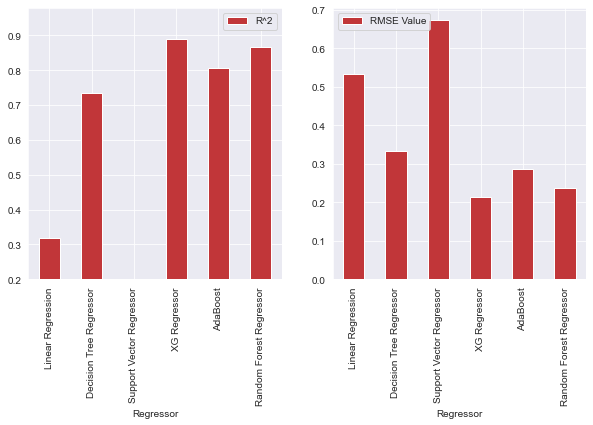

In [76]:
names = ['Linear Regression', 'Decision Tree Regressor', 
         'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [
    LinearRegression(), 
    DecisionTreeRegressor(),
    SVR(), 
    xg.XGBRegressor(),    
    AdaBoostRegressor(), 
    RandomForestRegressor()]

# Split the dataset into the response, y, and features, X for the first output
y1 = df1['Flow_Rate_Arbure']
X1 = df1.drop('Flow_Rate_Arbure', axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results1 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train1, y_train1)
    
    print ('... predicting')
    y_pred1 = clf.predict(X_train1)   
    pred_test1 = clf.predict(X_test1)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_1 = r2_score(y_test1, pred_test1)
    MSE_1 = mean_squared_error(y_test1, pred_test1)
    RMSE_1 = np.sqrt(mean_squared_error(y_test1, pred_test1))   
    MAE = mean_absolute_error(y_test1, pred_test1)
    
    # Save the results to dictionaries
    models[name] = clf
    
    results1.append([name, R2_1, MSE_1, RMSE_1, MAE, run_time.best])

    
results1_df = pd.DataFrame(results1, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'MAE', 'Train Time'])
results1_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results1_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results1_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results1_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

* The first chart comparing R^2 values of the different models in combination with the RMSE values in the second chart tips the following models for further assessment, namely; ```Decision Tree model```, ```Random Forest model```, and the ```XG Boost model```.
* The R^2 values shows the percentage/ratio of the variability in the dependent variable that is explained by the model, while the RMSE indicates the error on each data point predicted.

* The following will be a residual plot chart that allows a further assessment.

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,MAE,Train Time
Regressor,,,,,
Linear Regression,0.316162,0.005130,0.071622,0.039866,0.001587
Decision Tree Regressor,0.755536,0.001834,0.042823,0.011135,0.008148
Support Vector Regressor,-0.279132,0.009595,0.097955,0.081519,0.007828
XG Regressor,0.967729,0.000242,0.015559,0.008018,0.158312
AdaBoost,0.899945,0.000751,0.027396,0.020462,0.116581
Random Forest Regressor,0.957974,0.000315,0.017755,0.009320,0.581044


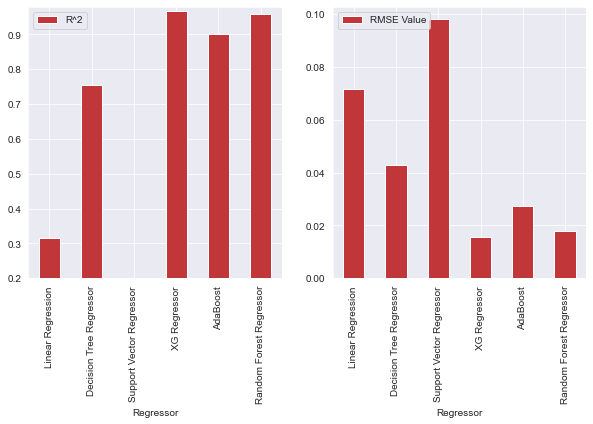

In [78]:
# Split the dataset into the response, y, and features, X for the second output
y2 = df2['Flow_Rate_Bugnano']
X2 = df2.drop('Flow_Rate_Bugnano', axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results2 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train2, y_train2)
    
    print ('... predicting')
    y_pred2 = clf.predict(X_train2)   
    pred_test2 = clf.predict(X_test2)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_2 = r2_score(y_test2, pred_test2)
    MSE_2 = mean_squared_error(y_test2, pred_test2)
    RMSE_2 = np.sqrt(mean_squared_error(y_test2, pred_test2))
    MAE_2 = mean_absolute_error(y_test2, pred_test2)
    
    # Save the results to dictionaries
    models[name] = clf
    
    results2.append([name, R2_2, MSE_2, RMSE_2, MAE_2, run_time.best])

    
results2_df = pd.DataFrame(results2, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'MAE', 'Train Time'])
results2_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results2_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results2_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results2_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,MAE,Train Time
Regressor,,,,,
Linear Regression,0.392775,2.186862,1.478804,1.108460,0.002385
Decision Tree Regressor,0.993198,0.024498,0.156519,0.080172,0.006298
Support Vector Regressor,-0.133344,4.081629,2.020304,1.153391,0.035561
XG Regressor,0.996035,0.014279,0.119496,0.078835,0.195704
AdaBoost,0.944489,0.199919,0.447123,0.328706,0.031367
Random Forest Regressor,0.982062,0.064602,0.254170,0.127455,0.501959


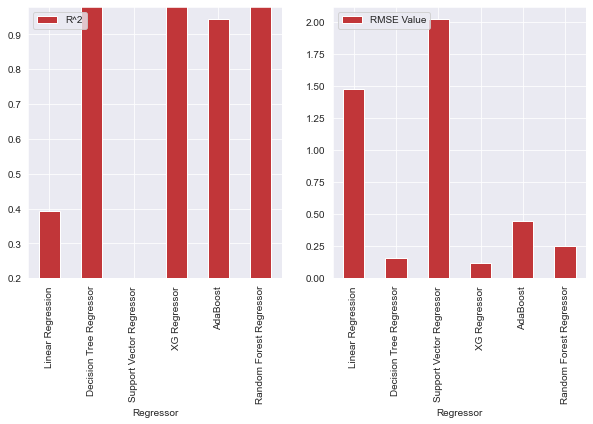

In [79]:
# Split the dataset into the response, y, and features, X for the third output
y3 = df3['Flow_Rate_Ermicciolo']
X3 = df3.drop('Flow_Rate_Ermicciolo', axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results3 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train3, y_train3)
    
    print ('... predicting')
    y_pred3 = clf.predict(X_train3)   
    pred_test3 = clf.predict(X_test3)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_3 = r2_score(y_test3, pred_test3)
    MSE_3 = mean_squared_error(y_test3, pred_test3)
    RMSE_3 = np.sqrt(mean_squared_error(y_test3, pred_test3))   
    MAE_3 = mean_absolute_error(y_test3, pred_test3)
    
    # Save the results to dictionaries
    models[name] = clf
    
    results3.append([name, R2_3, MSE_3, RMSE_3, MAE_3, run_time.best])

    
results3_df = pd.DataFrame(results3, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'MAE', 'Train Time'])
results3_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results3_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results3_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results3_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,MAE,Train Time
Regressor,,,,,
Linear Regression,0.770372,0.629611,0.793480,0.578238,0.002457
Decision Tree Regressor,0.768370,0.635099,0.796931,0.418542,0.009722
Support Vector Regressor,0.027513,2.666431,1.632921,1.417398,0.044879
XG Regressor,0.890170,0.301139,0.548761,0.359408,0.212914
AdaBoost,0.852879,0.403385,0.635126,0.475324,0.124507
Random Forest Regressor,0.903967,0.263309,0.513136,0.342809,0.590194


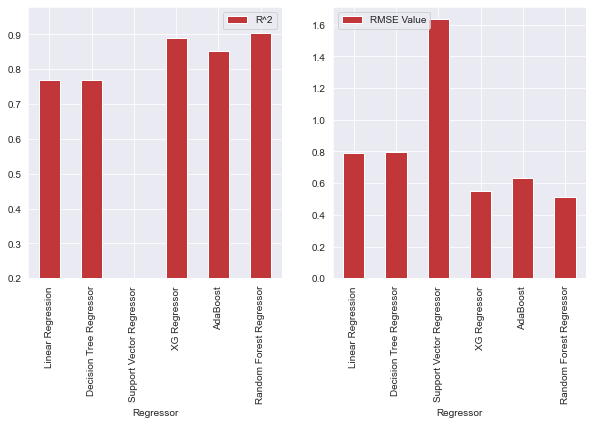

In [81]:
# Split the dataset into the response, y, and features, X for the fourth output
y4 = df4['Flow_Rate_Galleria_Alta']
X4 = df4.drop('Flow_Rate_Galleria_Alta', axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results4 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train4, y_train4)
    
    print ('... predicting')
    y_pred4 = clf.predict(X_train4)   
    pred_test4 = clf.predict(X_test4)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_4 = r2_score(y_test4, pred_test4)
    MSE_4 = mean_squared_error(y_test4, pred_test4)
    RMSE_4 = np.sqrt(mean_squared_error(y_test4, pred_test4))   
    MAE_4 = mean_absolute_error(y_test4, pred_test4)
    
    # Save the results to dictionaries
    models[name] = clf
    
    results4.append([name, R2_4, MSE_4, RMSE_4, MAE_4, run_time.best])

    
results4_df = pd.DataFrame(results4, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'MAE', 'Train Time'])
results4_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results4_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results4_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results4_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

* Although the Random Forest model trains with the highest duration, it gives the best result based on the observed R^2 values and the RMSE of all the outputs tested.

* Further statistical analysis will be carried out using the statsmodel library.

* Then hyperparameter tuning to follow.

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">6. Hyperparameter Tuning 🔩 🔧</p>

___

* Two of the best three models chosen in the previos section will have their parameters tuned to optimize their performance, namely:
 - The Random Forest Model
 - The XG Boost model
* Owing to the inherent ```over-fitting``` tendencies of the Decision tree model, and the fact that its algorithm was improved to solve the over-fitting problem in the Random Forest model, The latter has been chosen over it.

___

In [96]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[3,6,8,10,12,14,16]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=5,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


RandomForestRegressor(max_depth=10, max_features=12)

In [100]:
forest_tuned = RandomForestRegressor(max_depth=50, max_features=10, n_estimators=300)
forest_tuned.fit(X_train, y_train)
pred_forest_tuned = forest_tuned.predict(X_test)
# Evaluating R^2 and RMSE values
MSE = mean_squared_error(pred_forest_tuned, y_test)
R2 = r2_score(pred_forest_tuned, y_test)
MAE = mean_absolute_error(pred_forest_tuned, y_test)

#Checking the metrics
print("R^2 = ", R2, " \nMSE = " , MSE, " \nMAE = " , MAE)

R^2 =  0.9109968931750753  
MSE =  0.023058860499061914  
MAE =  0.07232691375697431


**Comments**
- Model has improved with the tuned hyperparameters.
- R^2 improved from 82.7% to 91.1%
- Mean Absolute Error improved from 0.0833 to 0.0723 litres per second

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">7. Conclusion ✍️</p>

The desired output(s) for this notebook's objective has been successfully predicted using the Random Forest Regressor model which satisfactorily provides prediction with a maximum error of 0.0723 litres per second.

With this margin, we are able to determine the capacity of flow for the water bodies taking from the Spring Amiata any time of the year.

In addition to this prediction, insights shared by observing the different feature categories in the latter section of the EDA would also be important when charting on the project for water availability.

### References

* [3 Best metrics to evaluate Regression Model? from Towards Data Science](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)
* [Ten years of pluviometric analyses in Italy for civil protection purposes](https://www.nature.com/articles/s41598-021-99874-w)
* [Discover Amiata](http://www.monte-amiata.eu/english/amiata_culture_home.asp)
* [GeeksforGeeks](https://www.geeksforgeeks.org/python-programming-language/?ref=shm)
* [GeeksforGeeks](https://www.geeksforgeeks.org/python-programming-language/?ref=shm)